<a href="https://colab.research.google.com/github/Z-9000/ML-DL_with_TensorFlow/blob/Code-with-Google-Collab/01TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression with TensorFlow

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationship between a dependent variable(outcome variable) and one or more independent variable(predictors, covariates, features)

*   Architecture of a NN regression model
*   Input shapes and output shapes of a regression model (features and labels)
*   Creating custom data to view and fit
*   Steps in modelling
  1. Creating a model
  2. Compiling a model
  3. Fitting a model
  4. Evaluating a model
*   Different evaluation methods
*   Saving and loading models






In [4]:
import tensorflow as tf
print(tf.__version__)

2.19.0


**Regression inputs and outputs**

**Anatomy of a Neural Network**

**Creating Data to View and Fit**

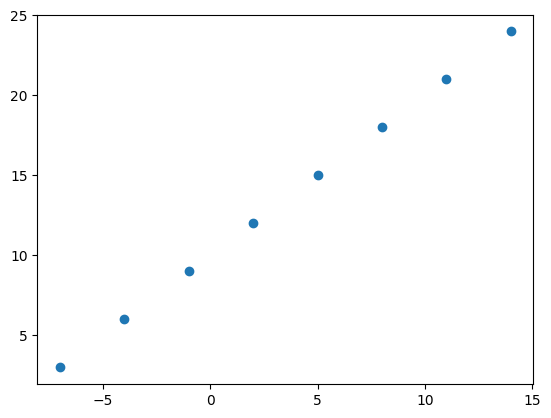

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X, y);

In [6]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [7]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [11]:
X[0].ndim

0

In [15]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

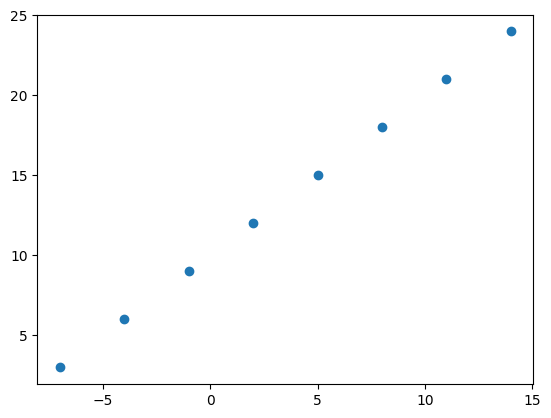

In [17]:
plt.scatter(X, y)

In [21]:
 # Building our model
tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
     tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - loss: 12.3260 - mae: 12.3260
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 12.1935 - mae: 12.1935
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 12.0610 - mae: 12.0610
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 11.9285 - mae: 11.9285
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 11.7960 - mae: 11.7960


In [22]:
# X an y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [30]:
y_pred = model.predict(tf.constant([[17.0]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[8.727056]], dtype=float32)

In [31]:
 # Improving our model using more epochs
tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
     tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 16.2032 - mae: 16.2032
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 15.9220 - mae: 15.9220
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 15.6407 - mae: 15.6407
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 15.3595 - mae: 15.3595
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 15.0782 - mae: 15.0782
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 14.8459 - mae: 14.8459
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 14.7134 - mae: 14.7134
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 14.5809 - mae: 14.5809
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 14.4484 - mae: 14.4484
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 14.3159 - mae: 14.3159
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 14.1834 - mae: 14.1834
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 14.0509 - mae: 14.0509
Epoch 13/100
1/1 ━━━━━━━

In [32]:
# X an y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [33]:
y_pred = model.predict(tf.constant([[17.0]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[29.283146]], dtype=float32)

In [34]:
 # Improving our model using more epochs and adding more hidden layers
tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - loss: 13.1547 - mae: 13.1547
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 12.6557 - mae: 12.6557
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.1446 - mae: 12.1446
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.6258 - mae: 11.6258
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 11.0923 - mae: 11.0923
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 10.5381 - mae: 10.5381
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9.9567 - mae: 9.9567
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 9.3396 - mae: 9.3396
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 8.6840 - mae: 8.6840
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 7.9841 - mae: 7.9841
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.2336 - mae: 7.2336
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 6.4258 - mae: 6.4258
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [35]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[31.143766]], dtype=float32)

In [39]:
 # Improving our model using more epochs and changing optimizer to adam
tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - loss: 11.8428 - mae: 11.8428
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.8383 - mae: 11.8383
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.8338 - mae: 11.8338
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.8293 - mae: 11.8293
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.8248 - mae: 11.8248
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.8203 - mae: 11.8203
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.8158 - mae: 11.8158
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.8113 - mae: 11.8113
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 11.8068 - mae: 11.8068
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.8023 - mae: 11.8023
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.7978 - mae: 11.7978
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.7933 - mae: 11.7933
Epoch 13/100
1/1 ━━━━━━━

In [40]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[9.849456]], dtype=float32)

In [49]:
 # Improving our model using more epochs and changing optimizer to adam, adding learning rate, adding more hidden layers
# Setting learning_rate = 0.0001 with 100 epochs
tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 962ms/step - loss: 13.5650 - mae: 13.5650
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.5328 - mae: 13.5328
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 13.5008 - mae: 13.5008
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13.4690 - mae: 13.4690
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 13.4377 - mae: 13.4377
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.4064 - mae: 13.4064
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.3751 - mae: 13.3751
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.3440 - mae: 13.3440
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13.3139 - mae: 13.3139
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 13.2842 - mae: 13.2842
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.2551 - mae: 13.2551
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13.2275 - mae: 13.2275
Epoch 13/100
1/1 ━━━━━━━

In [50]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[8.952603]], dtype=float32)

In [51]:
 # Improving our model using more epochs and changing optimizer to adam, adding learning rate, adding more hidden layers
# Setting learning_rate = 0.001 with 100 epochs
tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step - loss: 13.6794 - mae: 13.6794
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.3850 - mae: 13.3850
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13.1152 - mae: 13.1152
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.8672 - mae: 12.8672
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.6163 - mae: 12.6163
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.3579 - mae: 12.3579
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.0853 - mae: 12.0853
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.7967 - mae: 11.7967
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 11.4944 - mae: 11.4944
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.2772 - mae: 11.2772
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.0490 - mae: 11.0490
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.8039 - mae: 10.8039
Epoch 13/100
1/1 ━━━━━━━

In [52]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[30.938845]], dtype=float32)

In [55]:
 # Improving our model using more epochs and changing optimizer to adam, adding learning rate, adding more hidden layers
# Setting learning_rate = 0.01 with 100 epochs
tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step - loss: 13.7963 - mae: 13.7963
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.9981 - mae: 10.9981
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.1025 - mae: 8.1025
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 4.2770 - mae: 4.2770
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6.0772 - mae: 6.0772
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.9562 - mae: 7.9562
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 6.9166 - mae: 6.9166
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.1002 - mae: 5.1002
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 3.8166 - mae: 3.8166
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.5160 - mae: 4.5160
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5.2943 - mae: 5.2943
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5.3378 - mae: 5.3378
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61m

In [56]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[27.129763]], dtype=float32)

In [57]:
 # Improving our model using more epochs and changing optimizer to adam, adding learning rate, adding more hidden layers
# Setting learning_rate = 0.1 with 100 epochs
tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.0060 - mae: 13.0060
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 100.3298 - mae: 100.3298
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 16.5723 - mae: 16.5723
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13.7038 - mae: 13.7038
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.6024 - mae: 12.6024
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.6564 - mae: 9.6564
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.4912 - mae: 9.4912
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4.9162 - mae: 4.9162
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 9.5810 - mae: 9.5810
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.6485 - mae: 9.6485
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.9459 - mae: 6.9459
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.6259 - mae: 7.6259
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [58]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[27.070742]], dtype=float32)

In [61]:
 # Improving our model using more epochs and changing optimizer to adam, adding learning rate, adding more hidden layers
### Setting learning_rate = 1.0 with 100 epochs
tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=1.0),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step - loss: 12.7585 - mae: 12.7585
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 251527.9531 - mae: 251527.9531
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2915.7073 - mae: 2915.7073
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 739.8765 - mae: 739.8765
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 180.8324 - mae: 180.8324
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6143.8447 - mae: 6143.8447
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 4214.6504 - mae: 4214.6504
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 989.4857 - mae: 989.4857
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 113.5779 - mae: 113.5779
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.2872 - mae: 10.2872
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.6357 - mae: 8.6357
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 6.9256 - mae: 6.9256


In [62]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[17.784737]], dtype=float32)

In [47]:
 # Improving our model using more epochs and changing optimizer to adam, adding learning rate, adding more hidden layers
# Setting learning rate to be 0.0001 with 1000 epochs
tf.random.set_seed(42)
 # 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step - loss: 13.3448 - mae: 13.3448
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 13.3107 - mae: 13.3107
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.2765 - mae: 13.2765
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13.2423 - mae: 13.2423
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13.2092 - mae: 13.2092
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13.1761 - mae: 13.1761
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 13.1430 - mae: 13.1430
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 13.1100 - mae: 13.1100
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 13.0775 - mae: 13.0775
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13.0451 - mae: 13.0451
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13.0127 - mae: 13.0127
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.9803 - mae: 12.9803
Epoch 13/100

In [48]:
y_pred = model.predict(tf.constant(([17.0])))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[28.684223]], dtype=float32)